<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/LinearReg_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as torch
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('04-LinearReg_Salary.csv')
df.shape

(30, 3)

In [4]:
df.dtypes

,0
Unnamed: 0,int64
YearsExperience,float64
Salary,float64


<Axes: xlabel='YearsExperience', ylabel='Salary'>

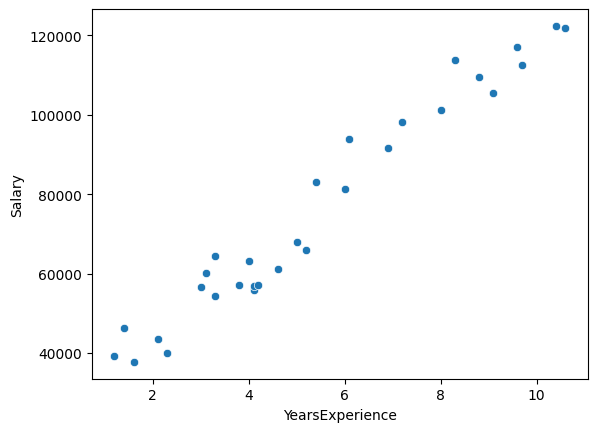

In [5]:
sns.scatterplot(x="YearsExperience", y="Salary", data=df)

In [6]:
x=df['YearsExperience']
y=df['Salary']
w=0
y_hat=w*x

loss=((y_hat-y)**2).mean()
print(loss)

6503107277.733334


In [7]:
dldw=(2*(w*x-y)*x).mean()
dldw

np.float64(-970008.8266666668)

In [8]:
w=w-0.01*dldw
w

np.float64(9700.088266666668)

In [9]:
y_hat=w*x
loss=((y_hat-y)**2).mean()
print(loss)

583734924.0285469


In [10]:
def forward (w,x):
  return w*x
def lossf(y_pred,y):
  return ((y_pred-y)**2).mean()
def gradient(x,y,w):
  gr=(2*(w*x-y)*x).mean()
  return gr

x=df['YearsExperience']
y=df['Salary']

w=0
ep=10
lr=0.01
ws=np.array([w])

for epoch in range (ep):
  y_hat=forward(w,x)
  loss=lossf(y_hat,y)
  gr=gradient(x,y,w)
  w-=gr*lr

  print(f'epoch {epoch+1}: w={w:.3f}, loss={loss:.3f}')
  ws=np.append(ws,w)

epoch 1: w=9700.088, loss=6503107277.733
epoch 2: w=12204.780, loss=583734924.029
epoch 3: w=12851.525, loss=189065948.771
epoch 4: w=13018.523, loss=162751739.979
epoch 5: w=13061.645, loss=160997263.119
epoch 6: w=13072.779, loss=160880284.909
epoch 7: w=13075.654, loss=160872485.489
epoch 8: w=13076.397, loss=160871965.470
epoch 9: w=13076.588, loss=160871930.798
epoch 10: w=13076.638, loss=160871928.486


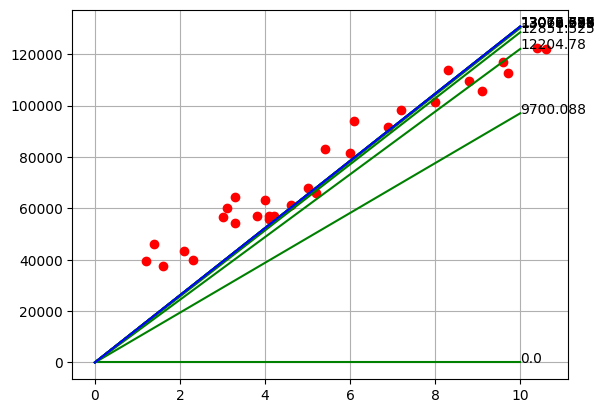

In [11]:
fig=plt.figure()
xv=np.linspace(0,10,1000)
plt.grid()

plt.plot(x,y,'ro')
for i in range(len(ws)-1):
  plt.plot(xv, ws[i]*xv, 'g')
  plt.annotate(np.round(ws[i],3),xy=(10,ws[i]*10))
plt.plot(xv,ws[-1]*xv, 'b')
plt.show()

In [12]:
def forward (w,x,b):
  return w*x+b
def lossf(y_pred,y):
  return ((y_pred-y)**2).mean()
def gradient(x,b,y,w):
  gr_w=(2*(w*x+b-y)*x).mean()
  gr_b=(2*(w*x+b-y)).mean()
  return gr_w,gr_b

x=df['YearsExperience']
y=df['Salary']

w=0
b=0
ep=10
lr=0.01
param=np.array([w,b])

for epoch in range (ep):
  y_hat=forward(w,x,b)
  loss=lossf(y_hat,y)
  gr_w,gr_b=gradient(x,b,y,w)
  w-=gr_w*lr
  b-=gr_b*lr

  print(f'epoch {epoch+1}: w={w:.3f}, b={b:.3f}, loss={loss:.3f}')
  param=np.vstack((param,[w,b]))

epoch 1: w=9700.088, b=1520.080, loss=6503107277.733
epoch 2: w=12040.206, b=1959.562, loss=514619474.061
epoch 3: w=12596.875, b=2136.898, loss=162124312.173
epoch 4: w=12721.414, b=2250.418, loss=140585000.604
epoch 5: w=12741.282, b=2348.185, loss=138486512.217
epoch 6: w=12735.827, b=2441.845, loss=137536439.579
epoch 7: w=12724.278, b=2534.223, loss=136660585.356
epoch 8: w=12711.295, b=2626.003, loss=135795816.393
epoch 9: w=12698.005, b=2717.353, loss=134938370.289
epoch 10: w=12684.684, b=2808.316, loss=134087971.382


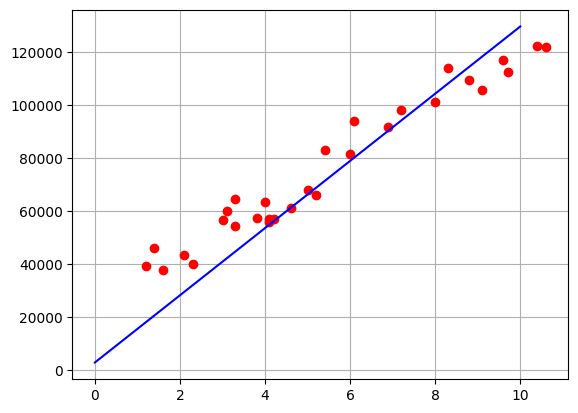

In [13]:
fig=plt.figure()
xv=np.linspace(0,10,1000)
plt.grid()

plt.plot(x,y,'ro')

plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')
plt.show()

In [14]:
def forward (w,x,b):
  return w*x+b
def lossf(y_pred,y):
  return ((y_pred-y)**2).mean()
def gradient(x,b,y,w):
  gr_w=(2*(w*x+b-y)*x).mean()
  gr_b=(2*(w*x+b-y)).mean()
  return gr_w,gr_b

def shuffle_data(X,y):
    N=X.shape[0]
    shuffled_idx=np.random.permutation(N)
    return X[shuffled_idx],y[shuffled_idx]

x=df['YearsExperience']
y=df['Salary']
x,y=shuffle_data(x,y)
N=x.shape[0]
batch_size=3
n_batches=N//batch_size

w=0.0
b=0.0
n_epoch=10
lr=0.01
param=np.array([w,b])

for epoch in range (n_epoch):
    running_loss=0.0
    bn=1
    for b_idx in range(0, N, batch_size):
        x_batch=x[b_idx:b_idx+batch_size]
        y_batch=y[b_idx:b_idx+batch_size]

        y_hat=forward(w,x_batch,b)
        loss=lossf(y_hat,y_batch)
        running_loss+=(loss*x_batch.shape[0])
        gr_w,gr_b=gradient(x_batch,b,y_batch,w)

        w-=gr_w*lr
        b-=gr_b*lr

        print(f'epoch {epoch+1}, batch {bn}: loss={loss:.3f}')
        bn+=1
        avg_loss=running_loss/N
        print(f'epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss={avg_loss:.3f}')
        param=np.vstack((param,[w,b]))

epoch 1, batch 1: loss=6455957468.000
epoch 1: w= 10086.132, b= 1430.467, loss=645595746.800
epoch 1, batch 2: loss=364952886.613
epoch 1: w= 12301.806, b= 1789.488, loss=682091035.461
epoch 1, batch 3: loss=147631535.630
epoch 1: w= 13338.910, b= 2006.807, loss=696854189.024
epoch 1, batch 4: loss=279632799.757
epoch 1: w= 12852.927, b= 2100.942, loss=724817469.000
epoch 1, batch 5: loss=24825370.668
epoch 1: w= 12378.793, b= 2057.148, loss=727300006.067
epoch 1, batch 6: loss=131123692.831
epoch 1: w= 12862.605, b= 2204.132, loss=740412375.350
epoch 1, batch 7: loss=74582830.266
epoch 1: w= 13218.659, b= 2275.939, loss=747870658.376
epoch 1, batch 8: loss=157726549.791
epoch 1: w= 11870.174, b= 2185.729, loss=763643313.356
epoch 1, batch 9: loss=313011728.954
epoch 1: w= 12560.799, b= 2472.889, loss=794944486.251
epoch 1, batch 10: loss=177017170.212
epoch 1: w= 13000.902, b= 2682.531, loss=812646203.272
epoch 2, batch 1: loss=173920633.966
epoch 2: w= 12273.151, b= 2733.255, loss=17

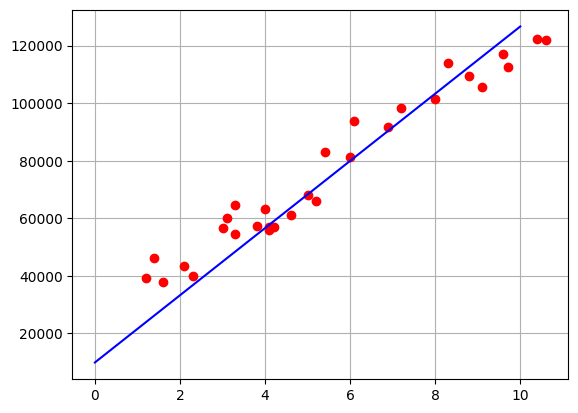

In [15]:
fig=plt.figure()
xv=np.linspace(0,10,1000)
plt.grid()

plt.plot(x,y,'ro')

plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')
plt.show()

In [16]:
xt=torch.tensor(df['YearsExperience'], dtype=torch.float32)
yt=torch.tensor(df['Salary'], dtype=torch.float32)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

lr=0.01
ep=10

def forward (w,b,x):
  return w*x+b

lossf=nn.MSELoss()
optimizer=torch.optim.SGD([w,b], lr=lr)

for epoch in range (ep):
  y_pred=forward(w,b,xt)
  loss=lossf(yt,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print(f'epoch {epoch+1}: w={w:.3f}, b={b:.3f}, loss={loss:.3f}')


epoch 1: w=9700.089, b=1520.080, loss=6503106560.000
epoch 2: w=12040.207, b=1959.562, loss=514619360.000
epoch 3: w=12596.875, b=2136.898, loss=162124272.000
epoch 4: w=12721.414, b=2250.418, loss=140584992.000
epoch 5: w=12741.281, b=2348.185, loss=138486544.000
epoch 6: w=12735.826, b=2441.845, loss=137536464.000
epoch 7: w=12724.278, b=2534.223, loss=136660608.000
epoch 8: w=12711.295, b=2626.003, loss=135795808.000
epoch 9: w=12698.006, b=2717.353, loss=134938352.000
epoch 10: w=12684.684, b=2808.315, loss=134087976.000


In [17]:
xt=torch.tensor(df['YearsExperience'], dtype=torch.float32).reshape(-1,1)
yt=torch.tensor(df['Salary'], dtype=torch.float32).reshape(-1,1)

n_sample, n_features=xt.shape

model=nn.Linear(n_features, 1)

with torch.inference_mode():
    model.weight[0,0]=0
    model.bias[0]=0

lr=0.01
ep=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range (ep):
  y_pred=model(xt)
  loss=lossfunc(yt,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  [w,b]=model.parameters()
  print(f'epoch {epoch+1}: w={w[0][0]:.3f}, b={b[0]:.3f}, loss={loss:.3f}')

epoch 1: w=9700.089, b=1520.080, loss=6503106560.000
epoch 2: w=12040.207, b=1959.562, loss=514619360.000
epoch 3: w=12596.875, b=2136.898, loss=162124272.000
epoch 4: w=12721.415, b=2250.418, loss=140584992.000
epoch 5: w=12741.281, b=2348.185, loss=138486544.000
epoch 6: w=12735.826, b=2441.845, loss=137536480.000
epoch 7: w=12724.278, b=2534.222, loss=136660608.000
epoch 8: w=12711.295, b=2626.003, loss=135795824.000
epoch 9: w=12698.006, b=2717.353, loss=134938384.000
epoch 10: w=12684.684, b=2808.315, loss=134087976.000


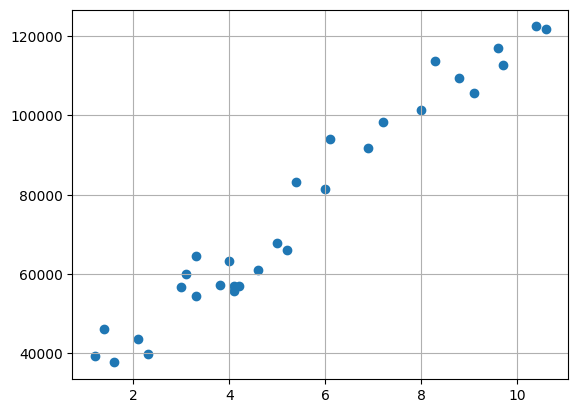

In [18]:
x=torch.tensor(df['YearsExperience'], dtype=torch.float32).reshape(-1,1)
y=torch.tensor(df['Salary'], dtype=torch.float32).reshape(-1,1)

y=y.view(y.shape[0],1)
n_samples, n_features=x.shape

fig=plt.figure()
xv=np.linspace(0,5,1000)
plt.grid()

plt.scatter(x,y)
plt.show()

In [19]:
model=nn.Linear(n_features, 1)

lr=0.02
ep=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range (ep):
  y_pred=model(x)
  loss=lossfunc(y,y_pred)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  [w,b]=model.parameters()
  print(f'epoch {epoch+1}: w={w[0][0]:.3f}, b={b[0]:.3f}, loss={loss:.3f}')

epoch 1: w=19400.285, b=3040.850, loss=6503495168.000
epoch 2: w=9360.271, b=1758.568, loss=1829725952.000
epoch 3: w=14493.011, b=2701.575, loss=587122048.000
epoch 4: w=11806.761, b=2495.452, loss=255819936.000
epoch 5: w=13150.394, b=2879.237, loss=166570240.000
epoch 6: w=12417.546, b=2956.729, loss=141627696.000
epoch 7: w=12755.152, b=3189.807, loss=133784744.000
epoch 8: w=12541.426, b=3340.459, loss=130503216.000
epoch 9: w=12612.156, b=3531.364, loss=128452752.000
epoch 10: w=12536.616, b=3699.317, loss=126748568.000


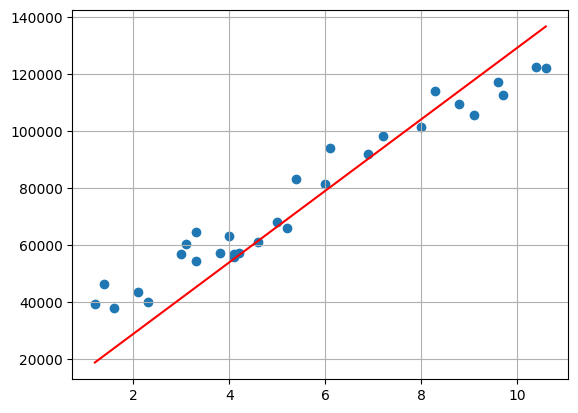

In [20]:
with torch.inference_mode():
    y_pred_line=model(x)
    fig=plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y_pred_line, 'r')
    plt.grid()
    plt.show()

In [21]:
from torch.utils.data import DataLoader,TensorDataset

dataset=TensorDataset(x,y)
train_loader=DataLoader(dataset=dataset, batch_size=10, shuffle=True)

In [22]:
model=nn.Linear(n_features, 1)

lr=0.02
n_epoch=100

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

#training
for epoch in range (n_epoch):
    for i,(inputs, labels) in enumerate (train_loader):
        y_pred=model(x)
        loss=lossfunc(y,y_pred)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0]:.3f}, b={b[0]:.3f}, loss={loss:.3f}')

epoch 1: w=14493.105, b=2700.699, loss=587113536.000
epoch 2: w=12417.677, b=2955.879, loss=141635232.000
epoch 3: w=12612.277, b=3530.534, loss=128460296.000
epoch 4: w=12498.363, b=4046.553, loss=123617424.000
epoch 5: w=12428.812, b=4556.053, loss=119152696.000
epoch 6: w=12355.271, b=5052.257, loss=114906392.000
epoch 7: w=12284.306, b=5536.439, loss=110865320.000
epoch 8: w=12214.971, b=6008.763, loss=107019512.000
epoch 9: w=12147.346, b=6469.538, loss=103359544.000
epoch 10: w=12081.373, b=6919.042, loss=99876360.000
epoch 11: w=12017.015, b=7357.553, loss=96561512.000
epoch 12: w=11954.229, b=7785.338, loss=93406832.000
epoch 13: w=11892.980, b=8202.660, loss=90404552.000
epoch 14: w=11833.229, b=8609.776, loss=87547360.000
epoch 15: w=11774.939, b=9006.935, loss=84828200.000
epoch 16: w=11718.075, b=9394.380, loss=82240440.000
epoch 17: w=11662.602, b=9772.350, loss=79777712.000
epoch 18: w=11608.485, b=10141.074, loss=77433984.000
epoch 19: w=11555.692, b=10500.780, loss=7520

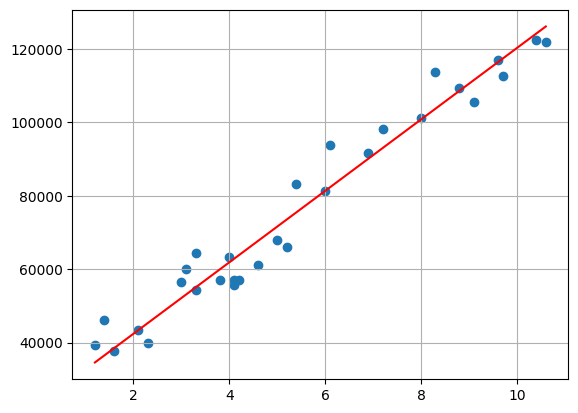

In [23]:
with torch.inference_mode():
    y_pred_line=model(x)
    fig=plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y_pred_line, 'r')
    plt.grid()
    plt.show()